In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
movie = pd.read_csv(r"C:\Users\Asus\Documents\Codsoft\Codsoft Dataset\IMDb Movies India.csv",encoding = 'latin')
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data Pre-processing
* Data Type conversion and
* Data manipulation

### Removing irrelavent column

In [39]:
movie = movie.drop('Name',axis=1)

### DataType And Conversion

In [40]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      14981 non-null  object 
 1   Duration  7240 non-null   object 
 2   Genre     13632 non-null  object 
 3   Rating    7919 non-null   float64
 4   Votes     7920 non-null   object 
 5   Director  14984 non-null  object 
 6   Actor 1   13892 non-null  object 
 7   Actor 2   13125 non-null  object 
 8   Actor 3   12365 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


### Missing Value and Treatment

In [41]:
movie.isnull().sum()

Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [43]:
# Handling missing values

# Fill 'Year' with the most frequent value (mode)
movie['Year'].fillna(movie['Year'].mode()[0], inplace=True)

# Convert 'Duration' to numeric (extract numbers) and fill missing with median
movie['Duration'] = movie['Duration'].str.extract('(\d+)').astype(float)
movie['Duration'].fillna(movie['Duration'].median(), inplace=True)

# Fill categorical columns ('Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3') with 'Unknown'
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    movie[col].fillna("Unknown", inplace=True)

# Convert 'Votes' to numeric and fill missing values with 0
movie['Votes'] = pd.to_numeric(movie['Votes'], errors='coerce')
movie['Votes'].fillna(0, inplace=True)

# Drop rows where 'Rating' is missing (since it's the target variable)
movie.dropna(subset=['Rating'], inplace=True)

# Print missing values after handling
print(movie.isnull().sum())


Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [44]:
### Outlier detection and treatment

<Axes: >

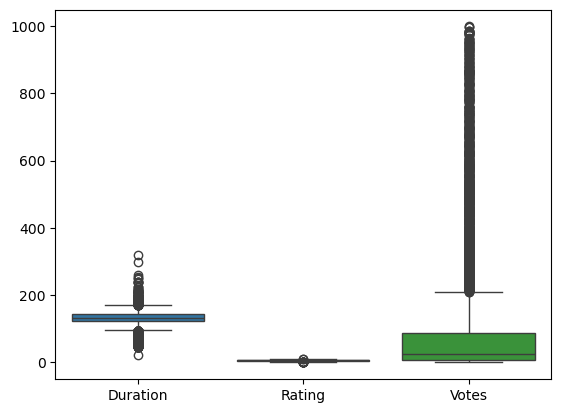

In [45]:
sns.boxplot(data = movie)

In [47]:
for i in movie:
    if movie[i].dtypes in ("float64","int64"):
        q1 = movie[i].quantile(0.25)  
        q3 = movie[i].quantile(0.75)  
        iqr = q3-q1 
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr 
        movie[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

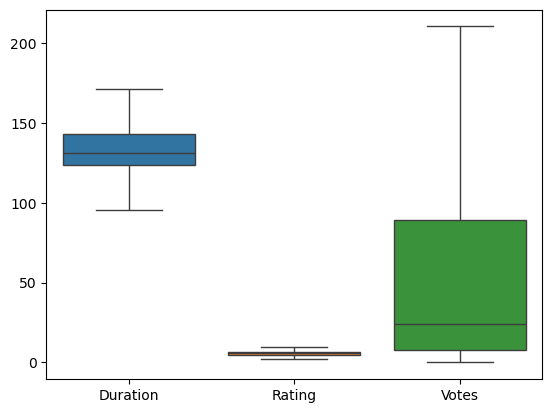

In [48]:
sns.boxplot(data = movie)

### Data Visualization

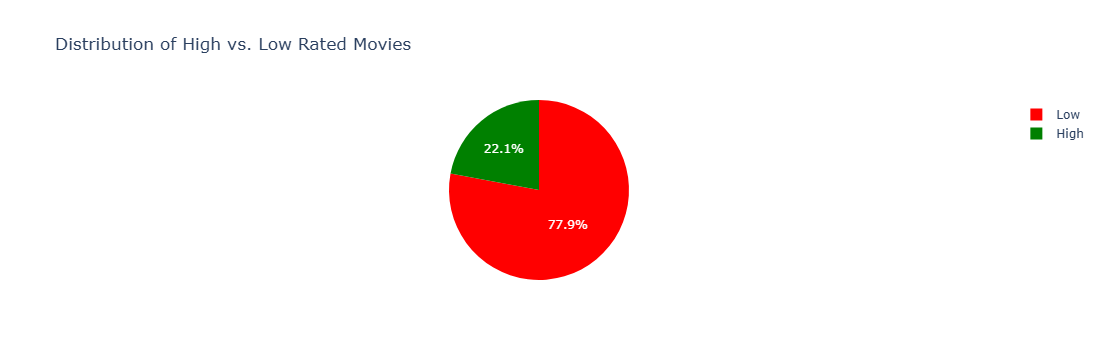

In [50]:
import plotly.express as px

movie['Rating_Category'] = movie['Rating'].apply(lambda x: 'High' if x >= 7 else 'Low')
fig = px.pie(movie, names='Rating_Category', color='Rating_Category',
             color_discrete_map={'High': 'green', 'Low': 'red'},
             title="Distribution of High vs. Low Rated Movies")
fig.show()


### Labeling Data

In [51]:
movie_num = movie.select_dtypes(include=[np.number])
movie_num.head(3)

,Duration,Rating,Votes
1,109.0,7.0,8.0
3,110.0,4.4,35.0
5,147.0,4.7,210.5


In [52]:
movie_dummies = movie.select_dtypes(include=['object'])
movie_dummies.head(3)

,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category
1,(2019),Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,High
3,(2019),"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Low
5,(1997),"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Low


In [53]:
from sklearn.preprocessing import LabelEncoder
movie_dummies = movie_dummies.apply(LabelEncoder().fit_transform)
movie_dummies.head(3)

,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category
1,89,268,811,1782,2815,377,0
3,89,207,1749,1589,890,2572,1
5,67,177,2005,508,85,2449,1


In [54]:
movie = pd.concat([movie_num, movie_dummies],axis=1)
movie.head()

,Duration,Rating,Votes,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category
1,109.0,7.0,8.0,89,268,811,1782,2815,377,0
3,110.0,4.4,35.0,89,207,1749,1589,890,2572,1
5,147.0,4.7,210.5,67,177,2005,508,85,2449,1
6,142.0,7.4,0.0,75,331,2643,931,1388,3030,0
8,95.5,5.6,210.5,82,367,174,2521,1461,1205,1


### Data Partition

In [56]:
from sklearn.model_selection import train_test_split

X = movie.drop('Rating', axis = 1)
Y = movie[['Rating']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

### Model Random--Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = movie.drop(columns=['Rating'])  # Drop target variable
y = movie['Rating']  # Target variable (continuous)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Initialize Random Forest Regressor
RFModel = RandomForestRegressor(
    random_state=20,
    n_estimators=25,      # Number of trees
    criterion="squared_error",  # Use squared error for regression
    max_depth=10,         # Limit tree depth to prevent overfitting
    min_samples_split=100,
    min_samples_leaf=50,
    max_features="sqrt"   # Feature selection in each tree
)

# Train the model
RFModel.fit(X_train, y_train)




RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=50,
                      min_samples_split=100, n_estimators=25, random_state=20)

### Importance Features

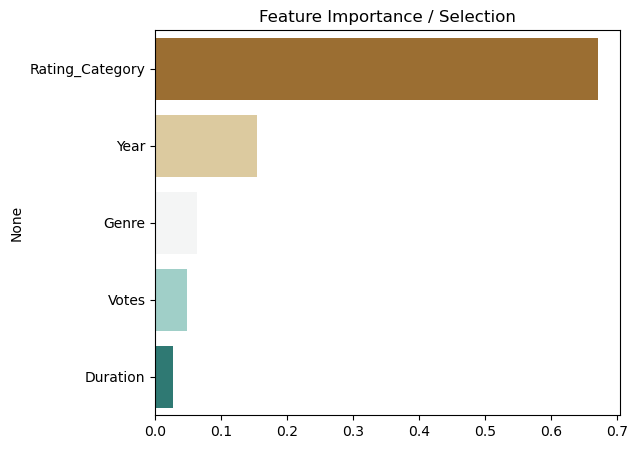

In [60]:
imp = pd.Series(data=RFModel.feature_importances_, index=RFModel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(6,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

### Top 5 Variable
* Rating_Category
* Year
* Genre
* Votes
* Duration

### Random Forest Visualization

In [61]:
!pip install pydot


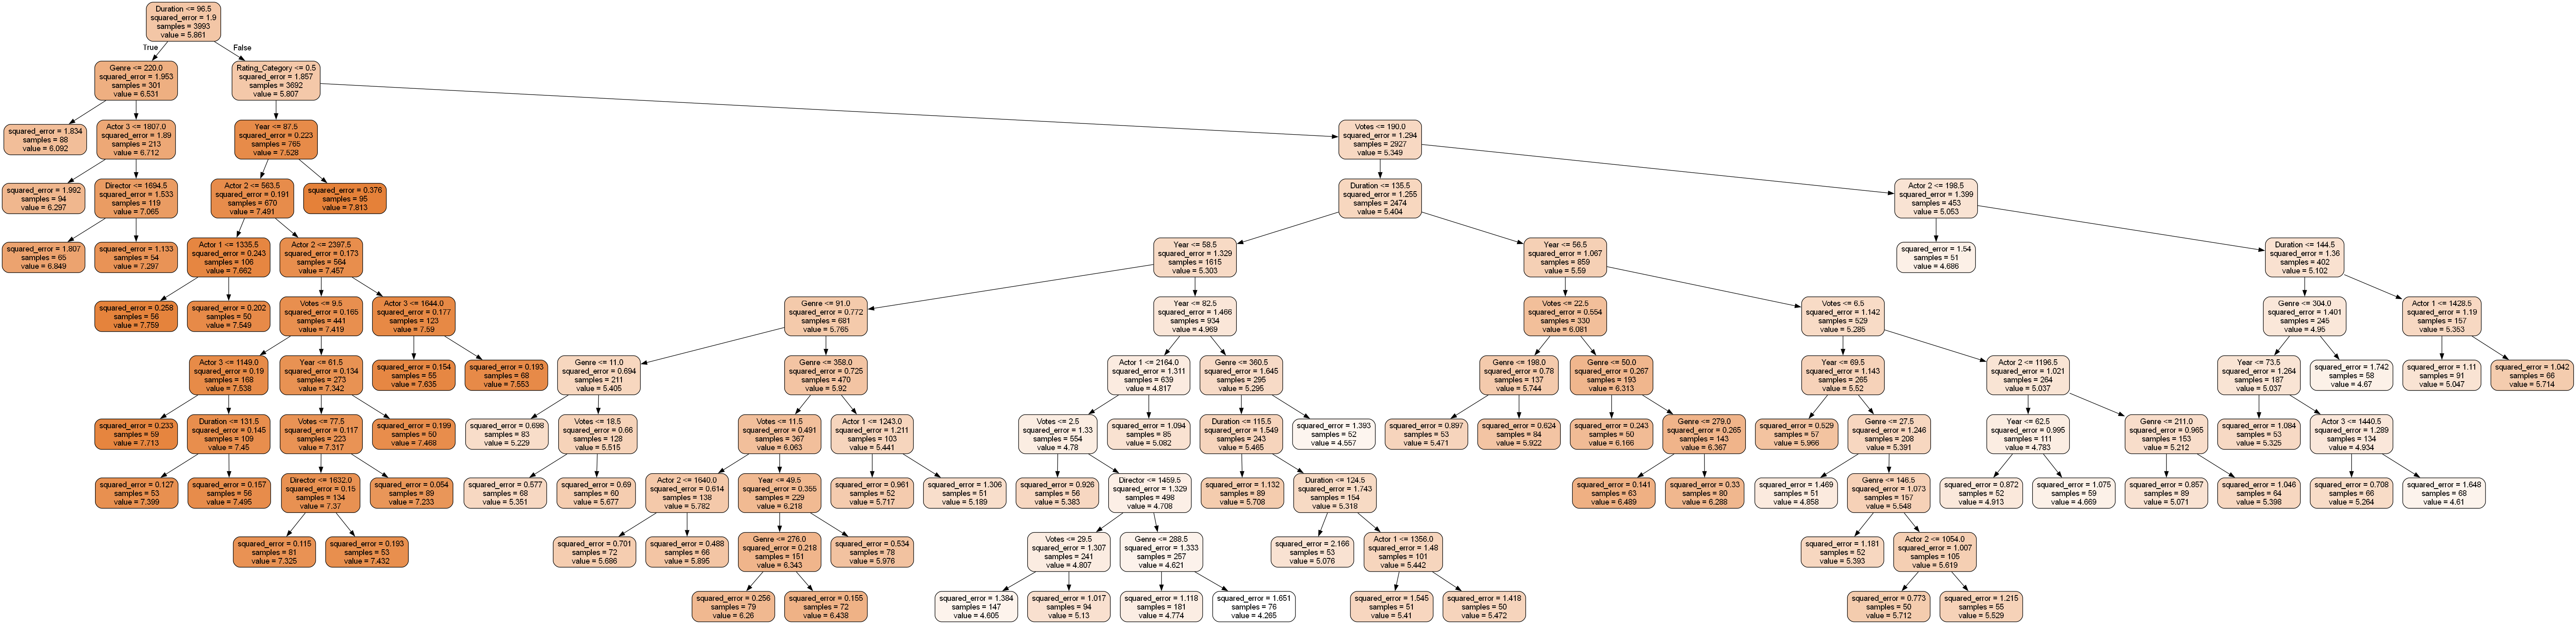

In [62]:
from sklearn.tree import export_graphviz
import pydot

tree = RFModel.estimators_[4]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = list(X.columns),  # all independent variable name
                class_names = ['No','Yes'] ,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

### Prediction on Train Dataset

In [63]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Duration,Votes,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category,Rating
5171,131.0,15.0,44,28,2349,1734,1998,1342,1,5.7
60,124.0,8.0,88,426,2634,1652,2369,2639,1,6.1
501,155.0,210.5,65,28,719,1711,11,1090,1,5.2
5581,136.0,31.0,68,0,2864,1304,2533,2061,1,5.6
12170,134.0,0.0,61,49,1422,1969,1707,668,1,6.5


In [64]:
train['Predicted'] = RFModel.predict(X_train)
train.head()

,Duration,Votes,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category,Rating,Predicted
5171,131.0,15.0,44,28,2349,1734,1998,1342,1,5.7,5.576653
60,124.0,8.0,88,426,2634,1652,2369,2639,1,6.1,5.003155
501,155.0,210.5,65,28,719,1711,11,1090,1,5.2,4.999086
5581,136.0,31.0,68,0,2864,1304,2533,2061,1,5.6,4.935135
12170,134.0,0.0,61,49,1422,1969,1707,668,1,6.5,5.318257


### Model Performance metrics

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'train' DataFrame has actual ('Rating') and predicted values ('Predicted')
y_true = train['Rating']
y_pred = train['Predicted']

# Calculate regression evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 0.79
Root Mean Squared Error (RMSE): 0.89
R² Score: 0.59


### Prediction on Test Dataset

In [69]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Duration,Votes,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category,Rating
14184,117.0,210.5,71,171,1003,1494,914,26,1,5.8
12052,139.0,23.0,52,268,624,575,2623,2611,1,6.3
3845,148.0,129.0,33,319,561,1273,1882,1930,1,6.7
10388,131.0,23.0,88,268,2764,339,1909,1699,0,8.0
6841,131.0,81.0,17,319,2601,657,1622,2478,0,7.5


In [70]:
test['Predicted'] = RFModel.predict(X_test)
test.head()

,Duration,Votes,Year,Genre,Director,Actor 1,Actor 2,Actor 3,Rating_Category,Rating,Predicted
14184,117.0,210.5,71,171,1003,1494,914,26,1,5.8,4.998777
12052,139.0,23.0,52,268,624,575,2623,2611,1,6.3,6.042252
3845,148.0,129.0,33,319,561,1273,1882,1930,1,6.7,6.427082
10388,131.0,23.0,88,268,2764,339,1909,1699,0,8.0,7.743975
6841,131.0,81.0,17,319,2601,657,1622,2478,0,7.5,7.357451


### Model Performance on Metric Data

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual and predicted ratings
y_true = test['Rating']
y_pred = test['Predicted']

# Calculate regression metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.71
Mean Squared Error (MSE): 0.86
Root Mean Squared Error (RMSE): 0.93
R² Score: 0.53
